In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import seasonal_decompose

# from tsa_base import get_forecast
# from tsa_base import plot_forecast
# from tsa_base import sym_abs_pct_error

import warnings
warnings.filterwarnings('ignore')

register_matplotlib_converters()

In [2]:
## non-production code
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', size=14)
plt.rcParams["figure.figsize"] = (15,7)

In [3]:
pwd

'/Users/sattwatikundu/BTI/DataScience_Handover_Materials/Explainability/SPJIMR'

In [4]:
df_raw= pd.read_csv('./data/ts.csv')
df_raw['date']=pd.to_datetime(df_raw['date'])
df_raw.head()

,dataType,date,tradingPartner,value
0,docCount,2018-03-22,A,131947
1,docVolume,2018-03-22,A,147199196
2,poValue,2018-03-22,A,137128565
3,invValue,2018-03-22,A,1215873515
4,payValue,2018-03-22,A,0


In [5]:
timeDF_A = df_raw[df_raw['tradingPartner']=='A']
timeDF_A

,dataType,date,tradingPartner,value
0,docCount,2018-03-22,A,131947
1,docVolume,2018-03-22,A,147199196
2,poValue,2018-03-22,A,137128565
3,invValue,2018-03-22,A,1215873515
4,payValue,2018-03-22,A,0
...,...,...,...,...
9975,docCount,2018-06-25,A,150214
9976,docVolume,2018-06-25,A,170500845
9977,poValue,2018-06-25,A,268834479
9978,invValue,2018-06-25,A,4069212817


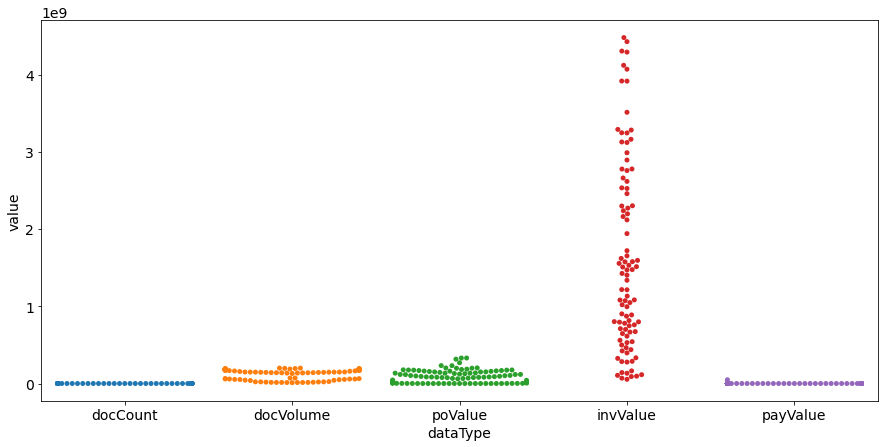

In [6]:
#create grouped bar chart
#sns.barplot(x='dataType', y='value', hue='tradingPartner', data=df_raw) 


sns.swarmplot(y = timeDF_A['value'], x = timeDF_A['dataType'])

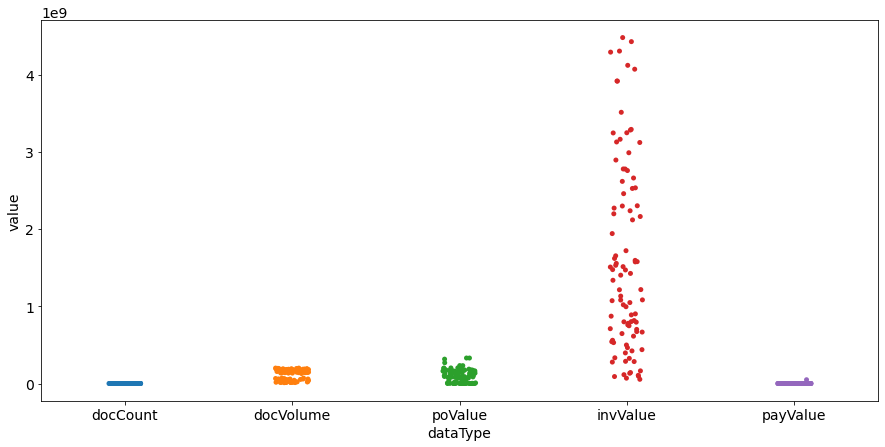

In [7]:
sns.stripplot(y = timeDF_A['value'], x = timeDF_A['dataType'])


In [8]:
mask = (df_raw['tradingPartner'] == 'A')
filterSeries = df_raw[mask]
print(filterSeries['dataType'].unique())

['docCount' 'docVolume' 'poValue' 'invValue' 'payValue']


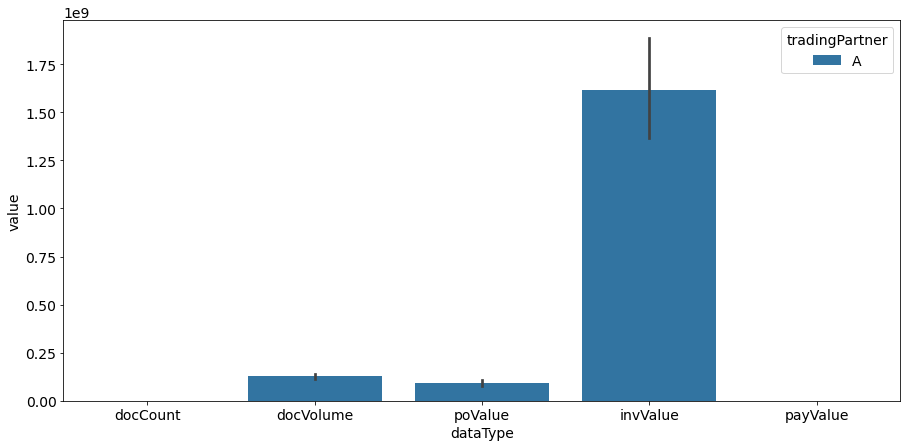

In [9]:
#create grouped bar chart
sns.barplot(x='dataType', y='value', hue='tradingPartner', data=filterSeries) 

['OlddocCount' 'OlddocVolume' 'OldpoValue' 'OldinvValue' 'OldpayValue']


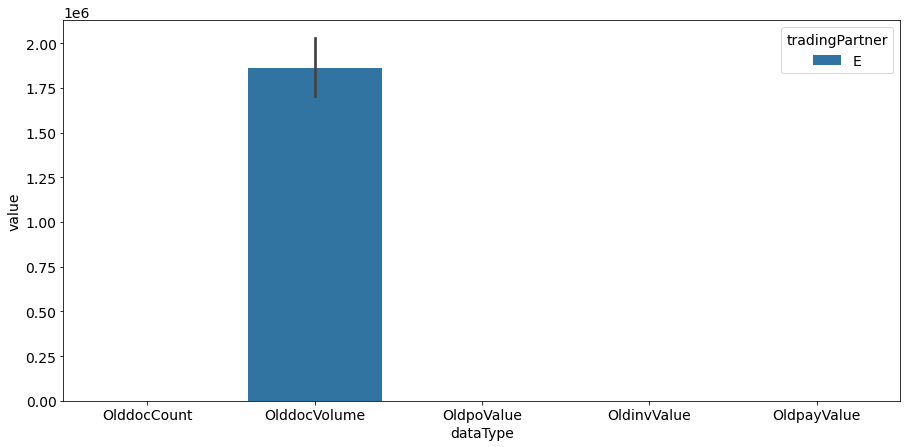

In [10]:
mask = (df_raw['tradingPartner'] == 'E')
filterSeries = df_raw[mask]
print(filterSeries['dataType'].unique())
#create grouped bar chart
sns.barplot(x='dataType', y='value', hue='tradingPartner', data=filterSeries) 

In [11]:
timeDF_A_docCount = timeDF_A[timeDF_A['dataType'] == 'docCount']
timeDF_A_docVolume = timeDF_A[timeDF_A['dataType'] == 'docVolume']

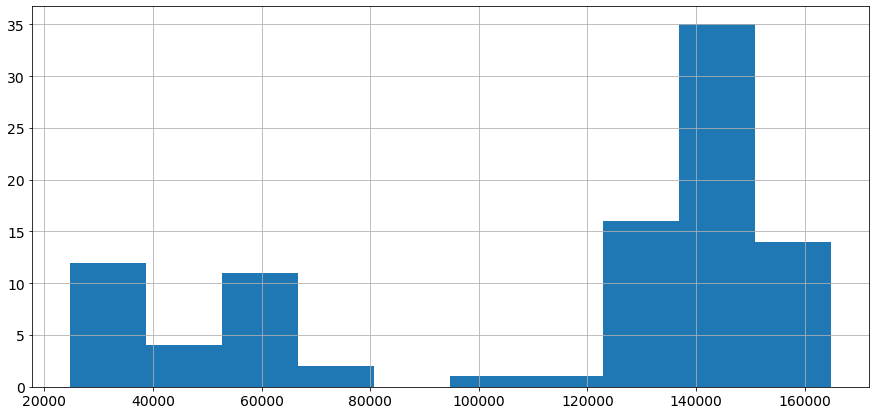

In [12]:
timeDF_A_docCount.value.hist()

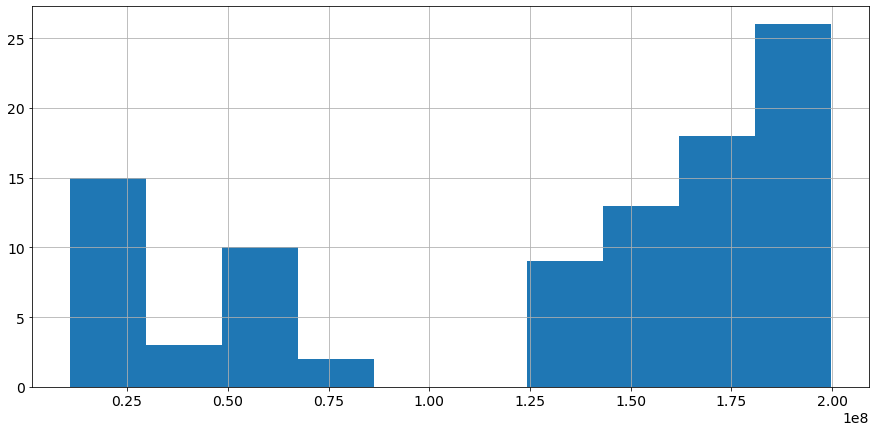

In [13]:
timeDF_A_docVolume.value.hist()

#### set index to date field to model time series

In [14]:
timeDF_A_docCount = timeDF_A_docCount.set_index("date")
timeDF_A_docVolume = timeDF_A_docVolume.set_index("date")

### Decomposing the Time Series

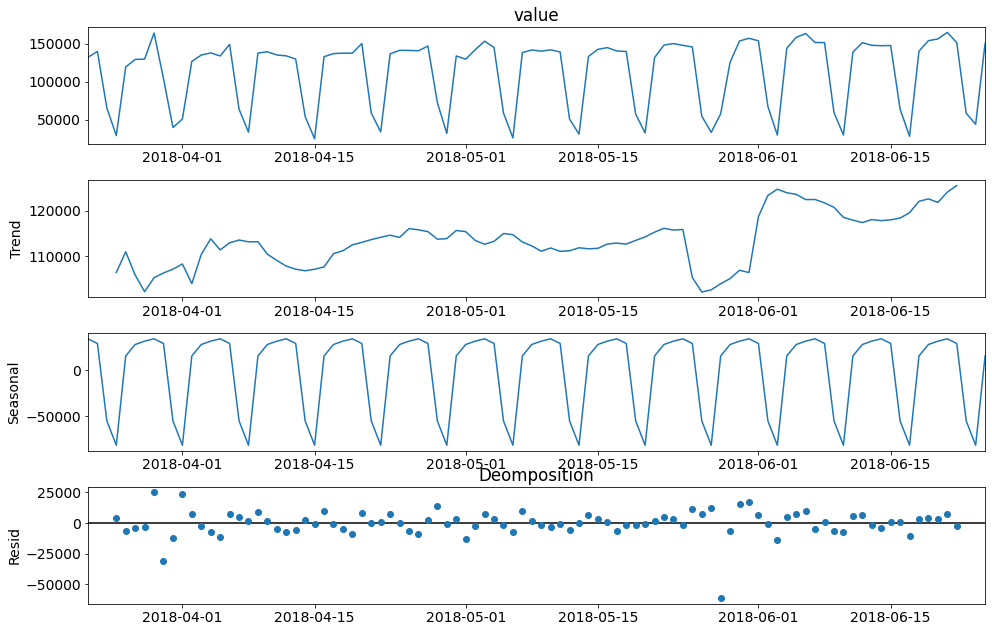

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = (14, 9)
decomposition = seasonal_decompose(timeDF_A_docCount['value'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()
plt.title('Deomposition')
plt.show()

### Single Holt Winters Exponential Smoothening

In [16]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose # holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
# Set the frequency of the date time index as Monthly start as indicated by the data
timeDF_A_docCount.index.freq ='D'  # Set the value of Alpha and define m (Time Period)
m = 7
alpha = 1/(2*m)

In [18]:
timeDF_A_docCount['HWES1'] = SimpleExpSmoothing(timeDF_A_docCount['value']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues

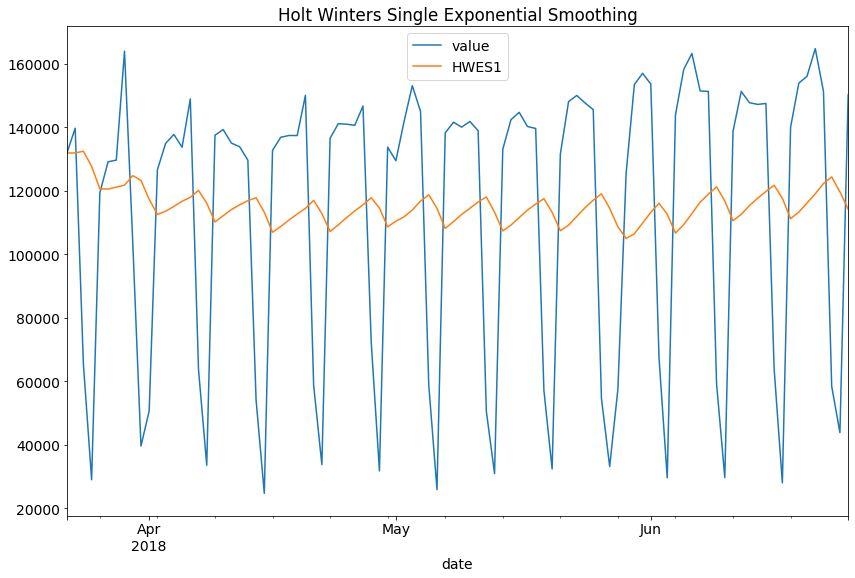

In [19]:

timeDF_A_docCount[['value','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

### Double HWES

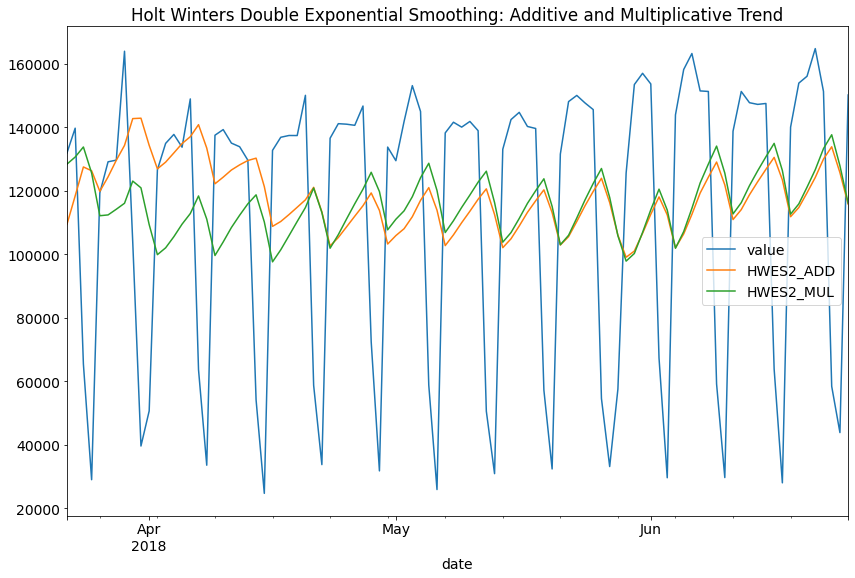

In [20]:
timeDF_A_docCount['HWES2_ADD'] = ExponentialSmoothing(timeDF_A_docCount['value'],trend='add').fit().fittedvalues
timeDF_A_docCount['HWES2_MUL'] = ExponentialSmoothing(timeDF_A_docCount['value'],trend='mul').fit().fittedvalues
timeDF_A_docCount[['value','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

### Triple HWES

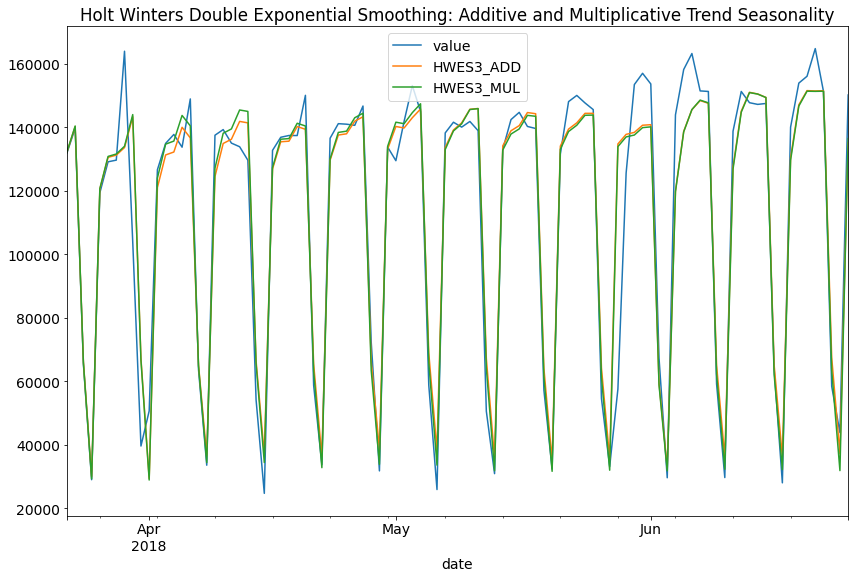

In [21]:
timeDF_A_docCount['HWES3_ADD'] = ExponentialSmoothing(timeDF_A_docCount['value'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
timeDF_A_docCount['HWES3_MUL'] = ExponentialSmoothing(timeDF_A_docCount['value'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
timeDF_A_docCount[['value','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend Seasonality');

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(timeDF_A_docCount.value,timeDF_A_docCount.HWES3_ADD)}')
print(f'Mean Squared Error = {mean_absolute_error(timeDF_A_docCount.value,timeDF_A_docCount.HWES3_ADD)}')

Mean Absolute Error = 7978.318180609324
Mean Squared Error = 7978.318180609324


In [23]:
print(f'Mean Absolute Error = {mean_absolute_error(timeDF_A_docCount.value,timeDF_A_docCount.HWES3_MUL)}')
print(f'Mean Squared Error = {mean_absolute_error(timeDF_A_docCount.value,timeDF_A_docCount.HWES3_MUL)}')

Mean Absolute Error = 7450.508857842596
Mean Squared Error = 7450.508857842596


In [24]:
prediction_test=pd.read_csv("./data/Prediction based anomaly detection.csv")

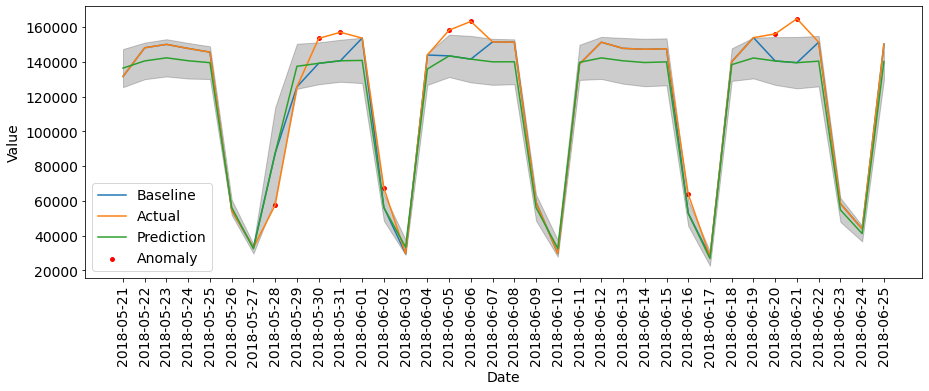

In [25]:
# Plot anomalies
# this part is not included in production code.

anomaly = prediction_test[prediction_test['anomalyflag']==1]
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(prediction_test['date'], prediction_test['baselinecount'], label='Baseline')
plt.plot(prediction_test['date'], prediction_test['actual'], label='Actual')
plt.plot(prediction_test['date'], prediction_test['prediction'], label='Prediction')
plt.scatter(anomaly['date'],anomaly['actual'],s=15,color='red', label='Anomaly')

plt.fill_between(prediction_test['date'],prediction_test['lowerlimit'].astype(float), prediction_test['upperlimit'].astype(float), color = 'k', alpha = 0.2)
plt.xticks(rotation=90)
plt.legend(loc='lower left')
plt.show()